In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from matplotlib import font_manager, rc

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [25,15]
plt.rcParams['font.size'] = 25

In [4]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
matching = [s for s in font_list if 'Gothic' in s]
print(matching)

['Yu Gothic', 'Century Gothic', 'Hancom Gothic', 'Yu Gothic', 'Hancom Gothic', 'HYGothic-Medium', 'Malgun Gothic', 'Franklin Gothic Medium', 'Malgun Gothic', 'Century Gothic', 'Yu Gothic', 'Hancom Gothic', 'Century Gothic', 'Century Gothic', 'Franklin Gothic Medium', 'MS Gothic', 'Yu Gothic', 'Yu Gothic', 'Century Gothic', 'Hancom Gothic', 'MS Gothic', 'HYGothic-Extra', 'HYGothic-Extra', 'Yu Gothic', 'Franklin Gothic Medium', 'Malgun Gothic', 'Century Gothic', 'Malgun Gothic', 'Century Gothic', 'Century Gothic', 'Malgun Gothic', 'HYGothic-Medium', 'Franklin Gothic Medium', 'Yu Gothic', 'Malgun Gothic', 'Yu Gothic']


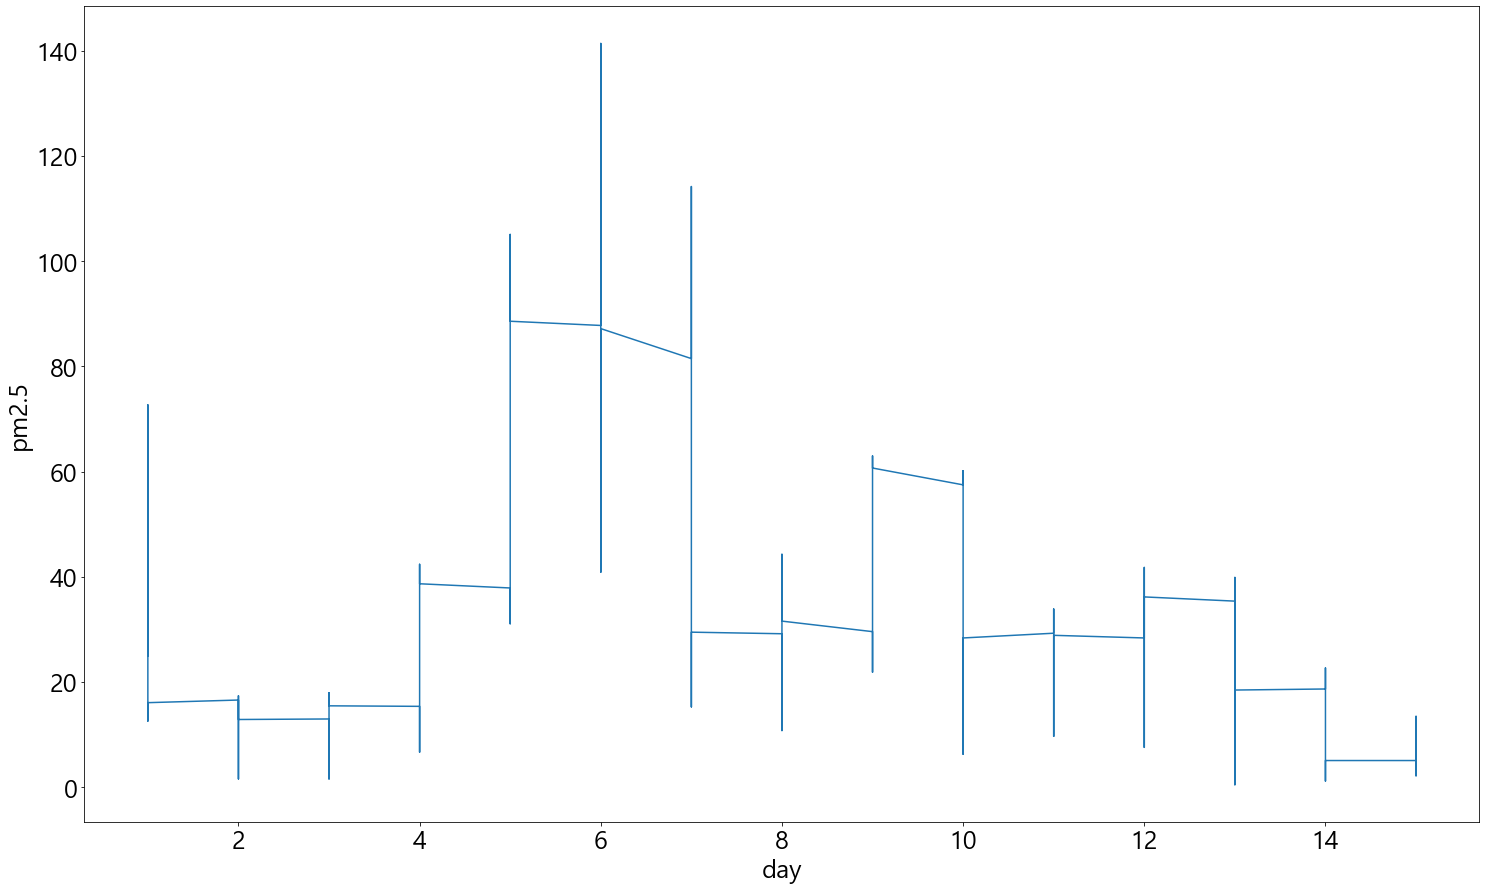

In [3]:
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)

# 그래프 그리기 day 기준
plt.plot(arim_data.day, arim_data.pm25)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.show()

              date  pm10  pm25
0    2023-01-01 01  32.0  21.0
1    2023-01-01 02  31.0  20.0
2    2023-01-01 03  27.0  21.0
3    2023-01-01 04  31.0  20.0
4    2023-01-01 05  30.0  21.0
..             ...   ...   ...
355  2023-01-15 20  18.0  11.0
356  2023-01-15 21  20.0  10.0
357  2023-01-15 22  21.0  10.0
358  2023-01-15 23  19.0   9.0
359  2023-01-16 00  17.0   9.0

[360 rows x 3 columns]


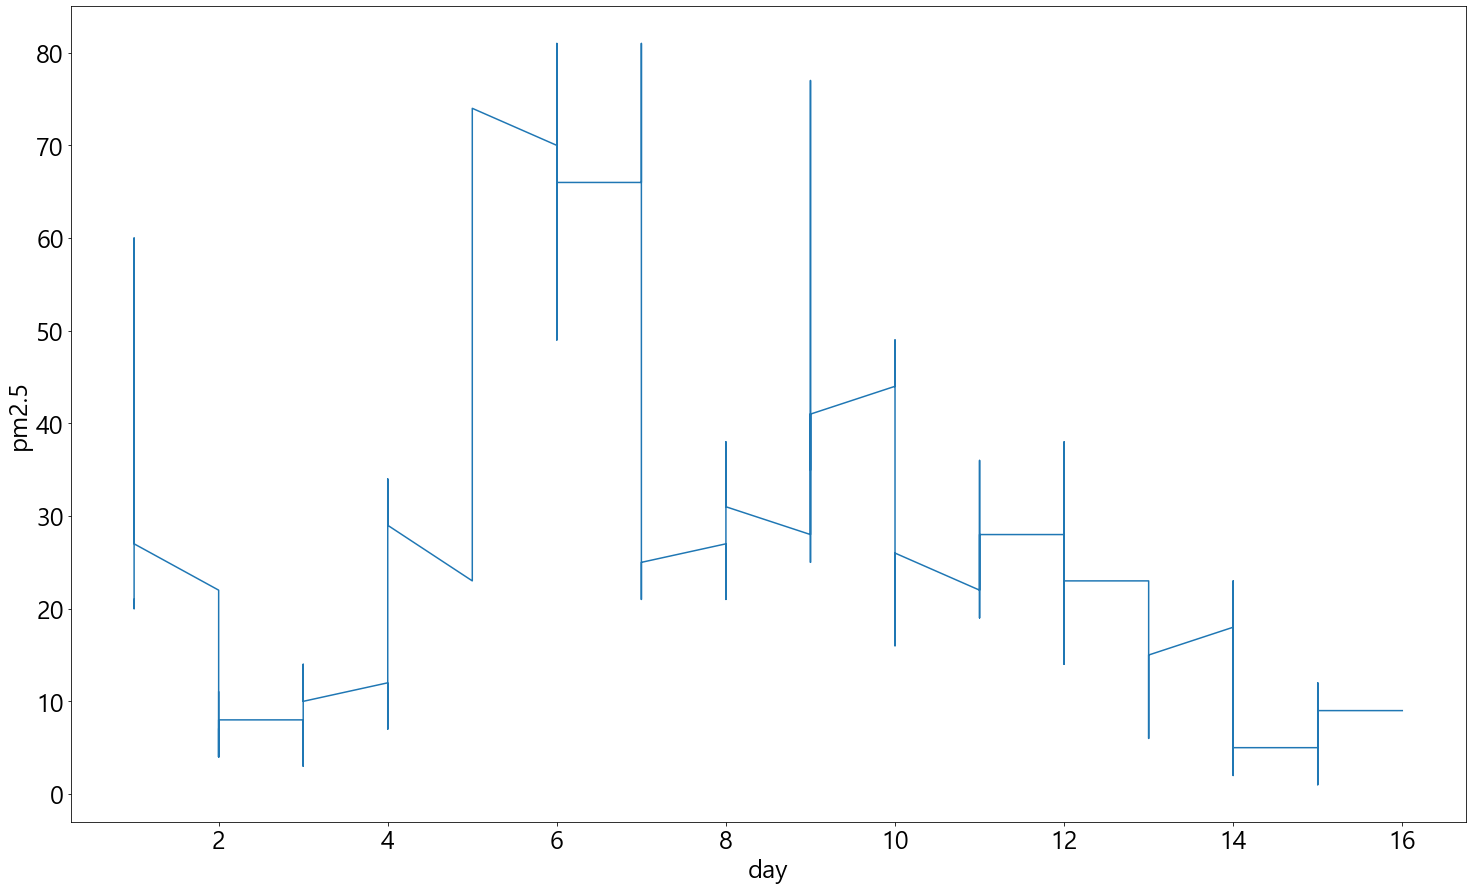

In [4]:
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')
print(airKorea_data)

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)

# 그래프 그리기 day 기준
plt.plot(airKorea_data.day, airKorea_data.pm25)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.show()

# 함수 정리본

In [2]:
# outliar 제거 함수 (현재 높은 값 1.5*IQR + 3quantile 설정) (1)
def remove_out(dataframe, remove_col) :
    dff = dataframe
    for k in remove_col :
        level_1q = arim_data[k].quantile(0.25)
        level_3q = arim_data[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 1.5
        outliar = dff[k] >= level_3q + (rev_range * IQR)
        dff[outliar]
        a=dff[outliar].index
        dff.drop(a, inplace=True)
        
# 마이크로초 단위까지 나와 있는 date 컬럼 값을 Hour 단위로 바꿔주기 위한 함수 (2)
def substract_minutes(date) :
    delta = timedelta(hours=date.hour,minutes=date.minute,seconds=date.second,microseconds=date.microsecond)
    return date - delta + timedelta(days=0, hours=date.hour)

# arim data 최댓값 인덱스 - 그 인덱스의 airKorea data 인덱스 비교 (3)
def find_max_value(data1, data2) :
    max_index = data1['pm25'].idxmax()
    arim = data1.loc[max_index, 'pm25'] # data1의 max값의 날짜에 맞는 pm25값
    arim_date = max_index # max_index값이 날짜로 설정되어 있으므로
    air = data2.loc[data2.index == arim_date] # data1와 같은 날짜 찾기
    return abs(arim - air.pm25) # arim data와 air data의 pm25[max]값 차이

# Arim_Data 1월1일 ~ 2월 28일까지 Day 기준

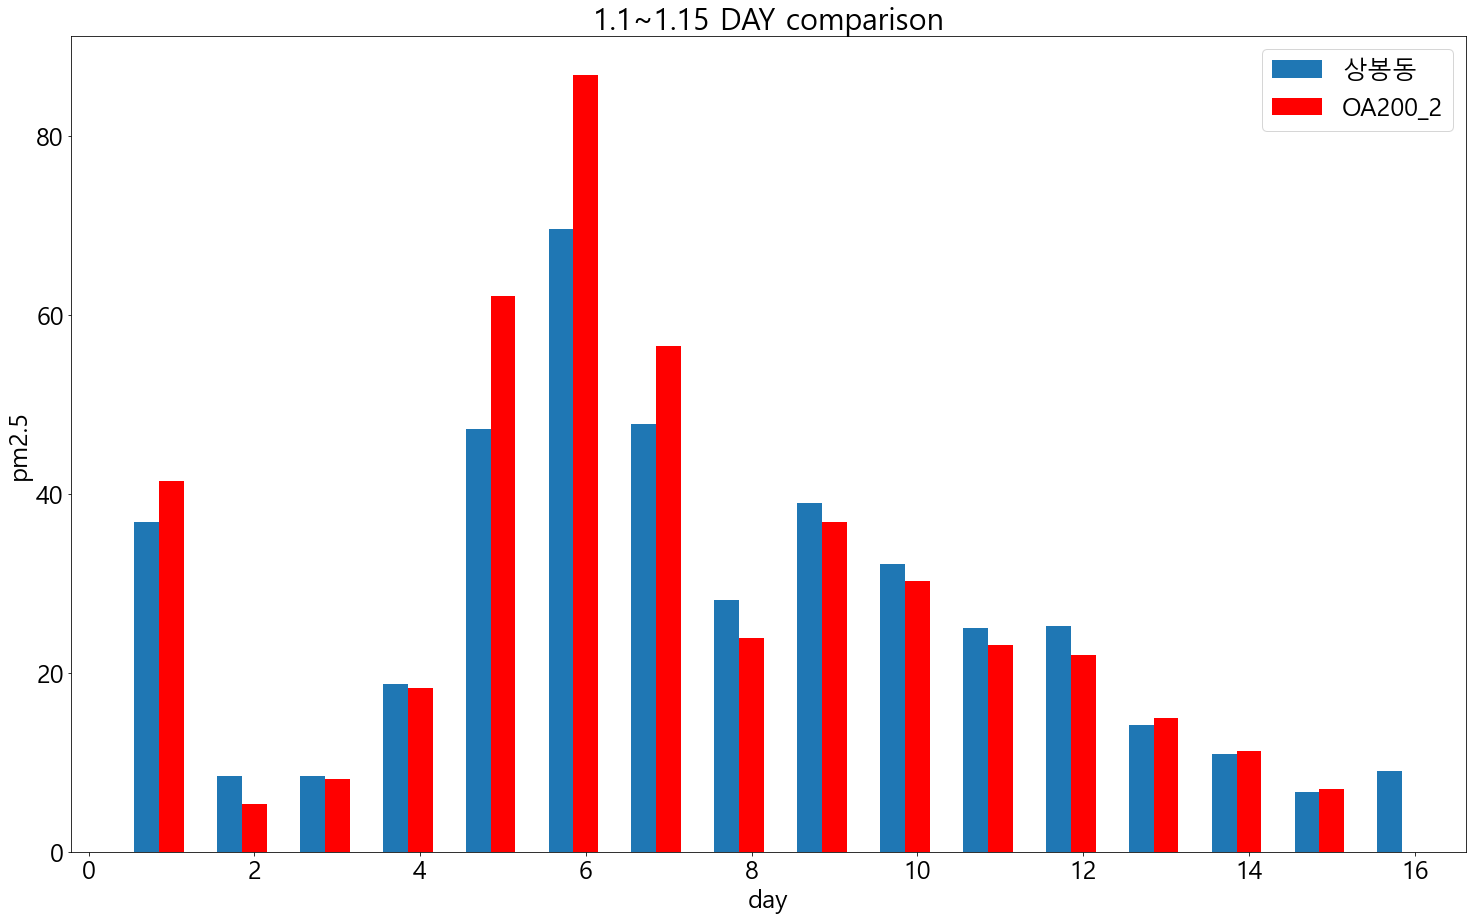

In [6]:
# arim_data 1.1~1.15 Day
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
arim_data_avg = arim_data.groupby('day').mean()



# airKorea_data 1.1~1.15
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
airKorea_data_avg = airKorea_data.groupby('day').mean()



# 그래프 2개 비교 ( 위는 선그래프, 아래는 막대 그래프 )
"""
plt.plot(airKorea_data.day, airKorea_data.pm25, arim_data.day, arim_data.pm25, 'r-')
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 DAY comparison')
plt.show()
"""

bar_width = 0.3
plt.bar(airKorea_data_avg.index-bar_width, airKorea_data_avg.pm25, label='상봉동', width=bar_width)
plt.bar(arim_data_avg.index, arim_data_avg.pm25, color='red', label='OA200_2', width=bar_width)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend()
plt.title('1.1~1.15 DAY comparison')
plt.show()

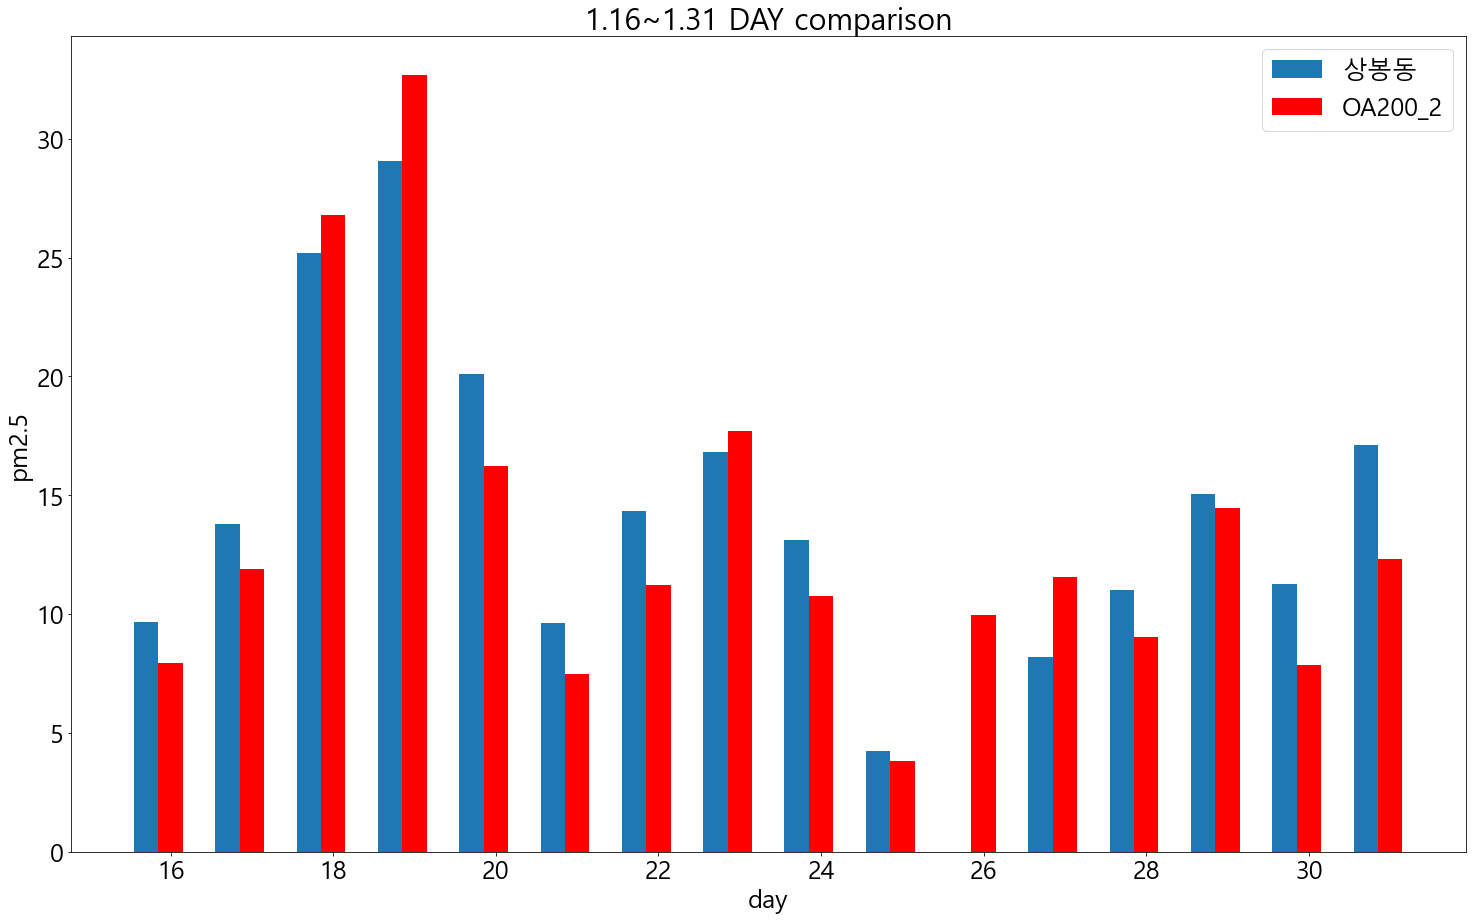

In [7]:
# arim_data 1.16~1.31 Day
arim_data = pd.read_csv('./OA200_2/OA2002_01.16~01.31.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
arim_data_avg = arim_data.groupby('day').mean()



# airKorea_data 1.16~1.31
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
airKorea_data_avg = airKorea_data.groupby('day').mean()



# 그래프 2개 비교 ( 위는 선그래프, 아래는 막대 그래프 )
"""
plt.plot(airKorea_data.day, airKorea_data.pm25, arim_data.day, arim_data.pm25, 'r-')
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 DAY comparison')
plt.show()
"""

bar_width = 0.3
plt.bar(airKorea_data_avg.index-bar_width, airKorea_data_avg.pm25, label='상봉동', width=bar_width)
plt.bar(arim_data_avg.index, arim_data_avg.pm25, color='red', label='OA200_2', width=bar_width)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend()
plt.title('1.16~1.31 DAY comparison')
plt.show()

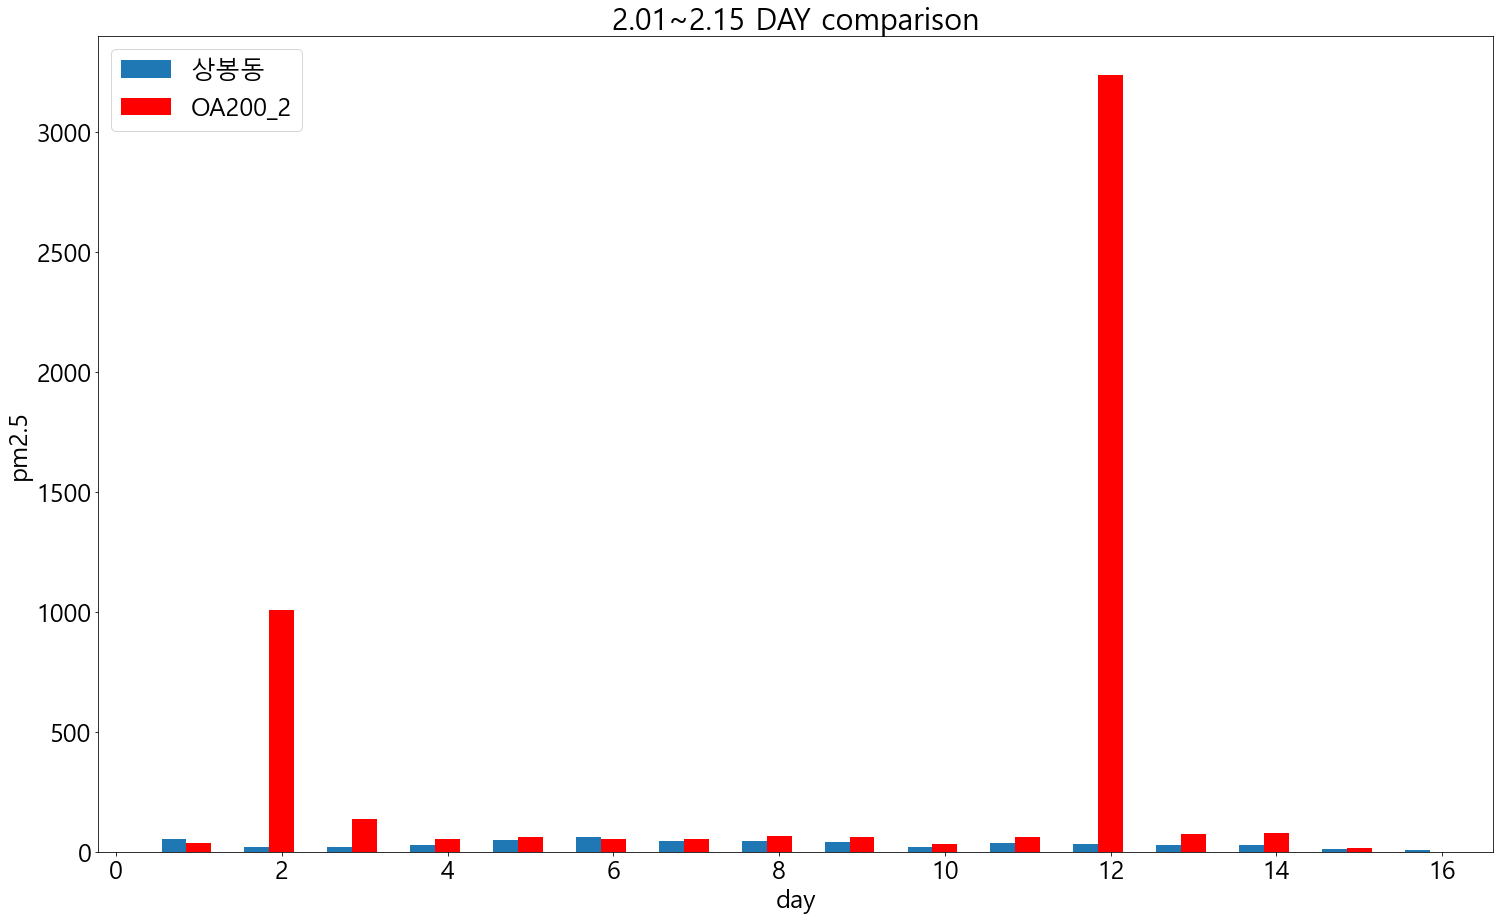

In [8]:
# arim_data 2.1~2.15 Day
arim_data = pd.read_csv('./OA200_2/OA2002_02.01~02.15.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)



# airKorea_data 2.1~2.15
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.01~02.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)



# 그래프 2개 비교 ( 위는 선그래프, 아래는 막대 그래프 )
"""
plt.plot(airKorea_data.day, airKorea_data.pm25, arim_data.day, arim_data.pm25, 'r-')
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 DAY comparison')
plt.show()
"""

bar_width = 0.3
plt.bar(airKorea_data.day-bar_width, airKorea_data.pm25, label='상봉동', width=bar_width)
plt.bar(arim_data.day, arim_data.pm25, color='red', label='OA200_2', width=bar_width)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend()
plt.title('2.01~2.15 DAY comparison')
plt.show()

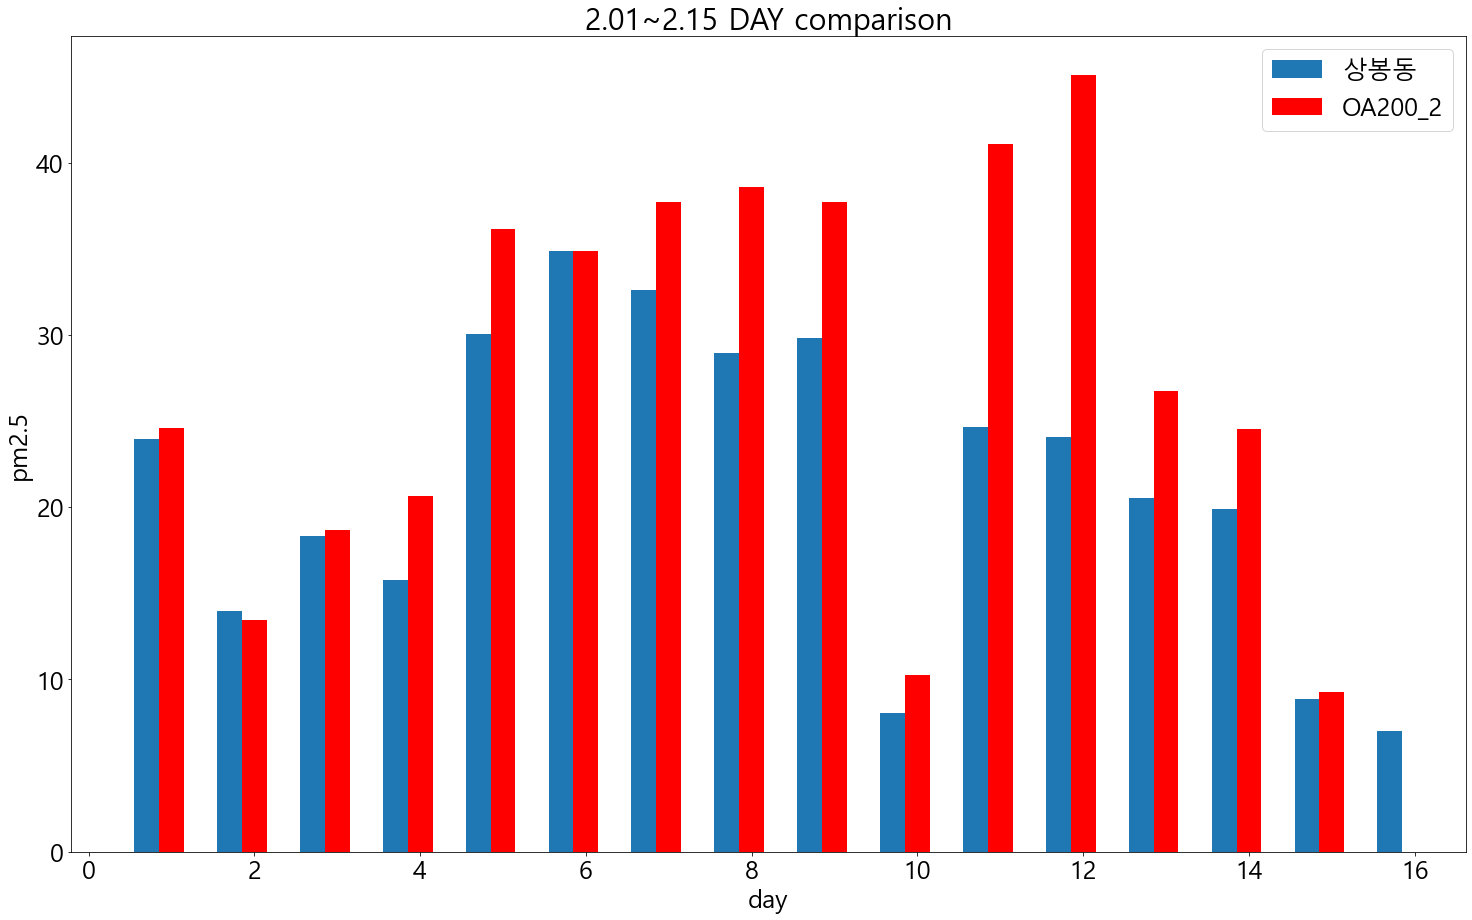

In [9]:
# arim_data 2.1~2.15 Day
arim_data = pd.read_csv('./OA200_2/OA2002_02.01~02.15.csv')

remove_out(arim_data, ['pm25'])

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
arim_data_avg = arim_data.groupby('day').mean()



# airKorea_data 2.1~2.15
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.01~02.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
airKorea_data_avg = airKorea_data.groupby('day').mean()



# 그래프 2개 비교 ( 위는 선그래프, 아래는 막대 그래프 )
"""
plt.plot(airKorea_data.day, airKorea_data.pm25, arim_data.day, arim_data.pm25, 'r-')
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 DAY comparison')
plt.show()
"""

bar_width = 0.3
plt.bar(airKorea_data_avg.index-bar_width, airKorea_data_avg.pm25, label='상봉동', width=bar_width)
plt.bar(arim_data_avg.index, arim_data_avg.pm25, color='red', label='OA200_2', width=bar_width)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend()
plt.title('2.01~2.15 DAY comparison')
plt.show()

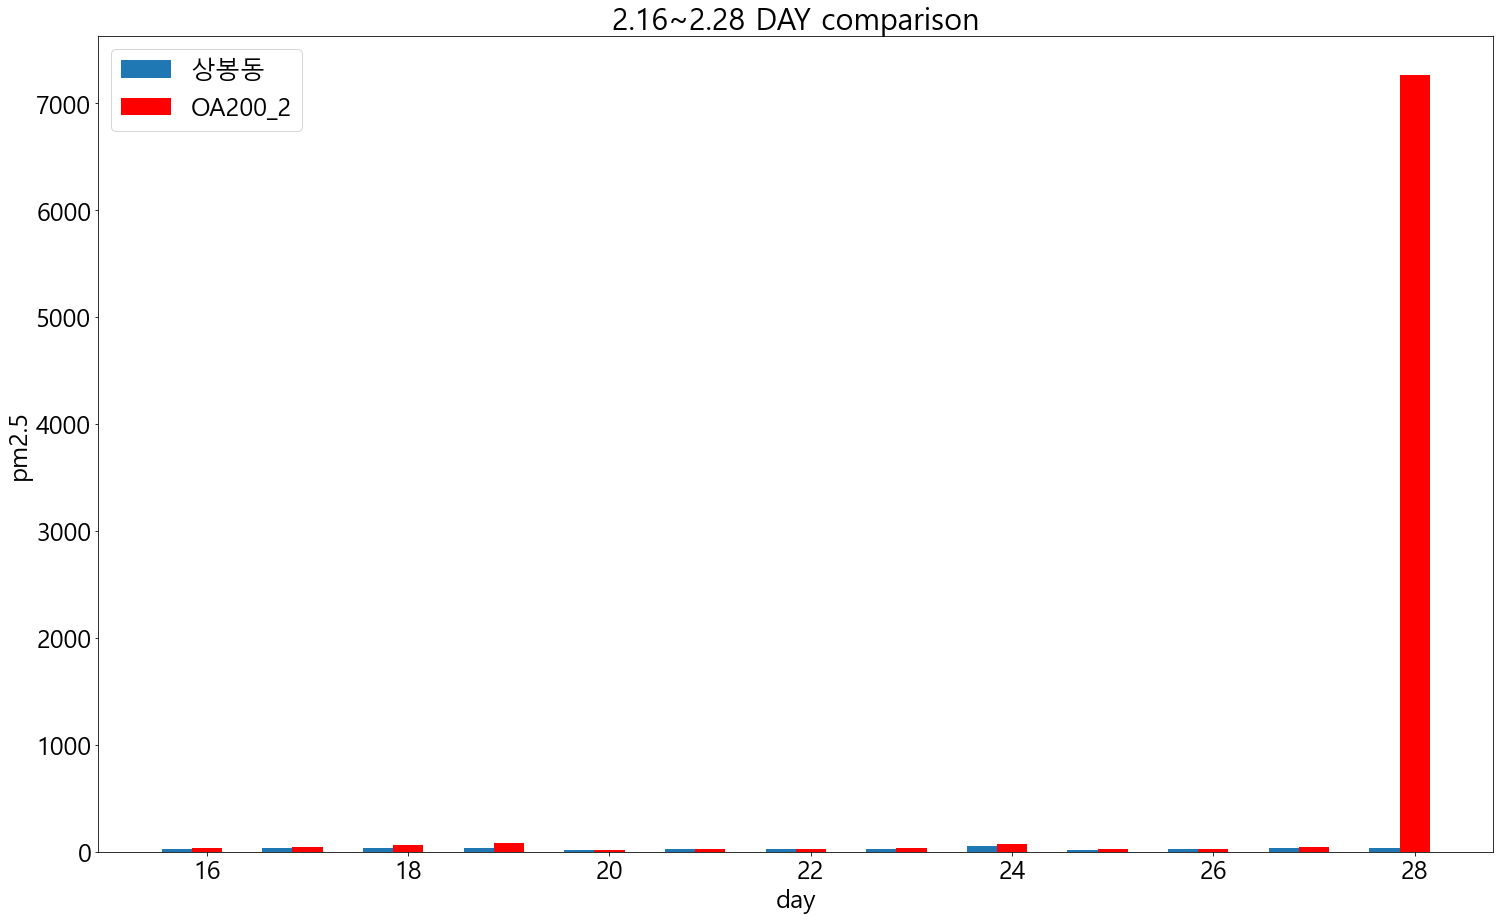

In [10]:
# arim_data 2.16~2.28 Day
arim_data = pd.read_csv('./OA200_2/OA2002_02.16~02.28.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)



# airKorea_data 2.16~2.28
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.16~02.28.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)



# 그래프 2개 비교 ( 위는 선그래프, 아래는 막대 그래프 )
"""
plt.plot(airKorea_data.day, airKorea_data.pm25, arim_data.day, arim_data.pm25, 'r-')
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 DAY comparison')
plt.show()
"""

bar_width = 0.3
plt.bar(airKorea_data.day-bar_width, airKorea_data.pm25, label='상봉동', width=bar_width)
plt.bar(arim_data.day, arim_data.pm25, color='red', label='OA200_2', width=bar_width)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend()
plt.title('2.16~2.28 DAY comparison')
plt.show()

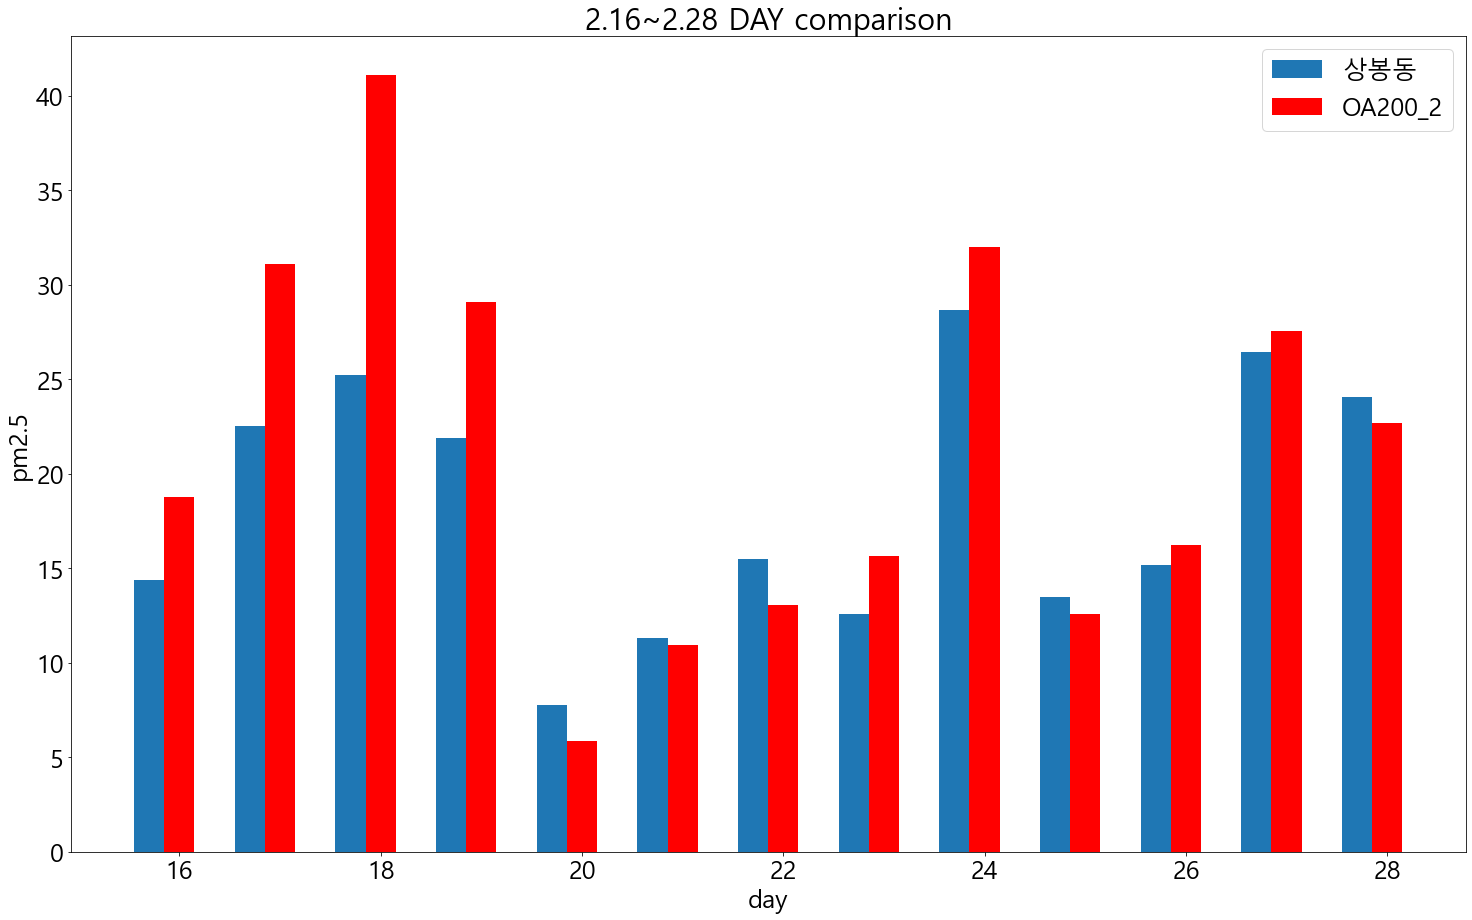

In [11]:
# arim_data 2.16~2.28 Day
arim_data = pd.read_csv('./OA200_2/OA2002_02.16~02.28.csv')

remove_out(arim_data, ['pm25'])

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['day'] = arim_data.reg_date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
arim_data_avg = arim_data.groupby('day').mean()



# airKorea_data 2.16~2.28
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.16~02.28.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data['day'] = airKorea_data.date.apply(lambda x : x.day)

# 날짜별로 그룹화하고 평균값 계산
airKorea_data_avg = airKorea_data.groupby('day').mean()



# 그래프 2개 비교 ( 위는 선그래프, 아래는 막대 그래프 )
"""
plt.plot(airKorea_data.day, airKorea_data.pm25, arim_data.day, arim_data.pm25, 'r-')
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 DAY comparison')
plt.show()
"""

bar_width = 0.3
plt.bar(airKorea_data_avg.index-bar_width, airKorea_data_avg.pm25, label='상봉동', width=bar_width)
plt.bar(arim_data_avg.index, arim_data_avg.pm25, color='red', label='OA200_2', width=bar_width)
plt.xlabel('day')
plt.ylabel('pm2.5')
plt.legend()
plt.title('2.16~2.28 DAY comparison')
plt.show()

# Data 비교 1월1일 ~ 2월 28일까지 Hour 기준

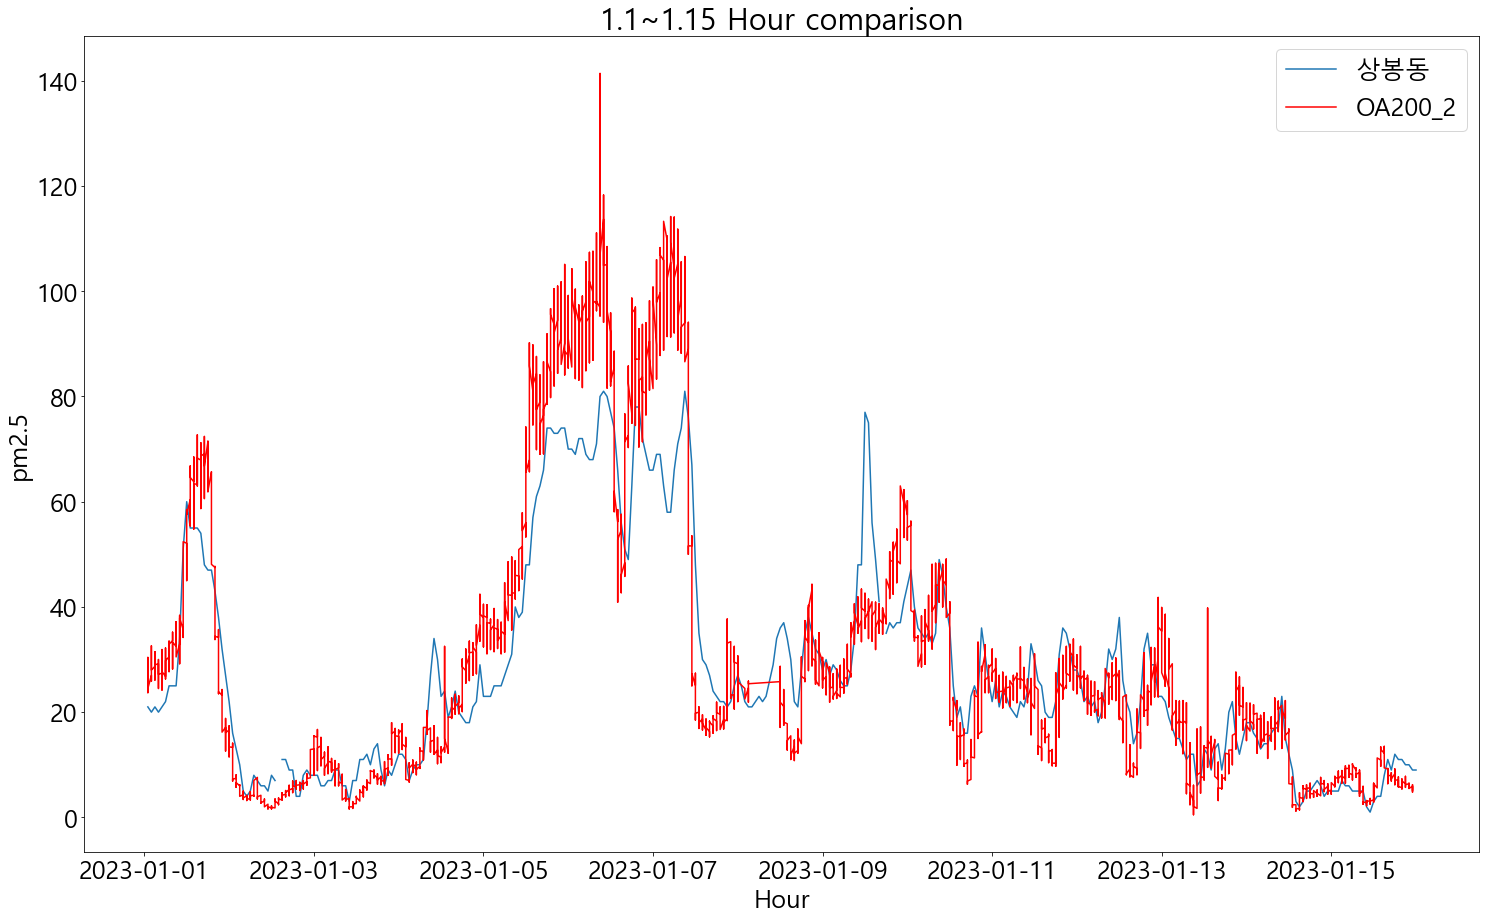

In [12]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 2번 함수
arim_data['date'] = arim_data['reg_date'].apply(lambda x : substract_minutes(x))



# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)



# 그래프 2개 비교
plt.plot(airKorea_data.date, airKorea_data.pm25, arim_data.date, arim_data.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 Hour comparison')
plt.show()


### 위랑 비교 2번함수 사용과 groupby함수 사용 방법

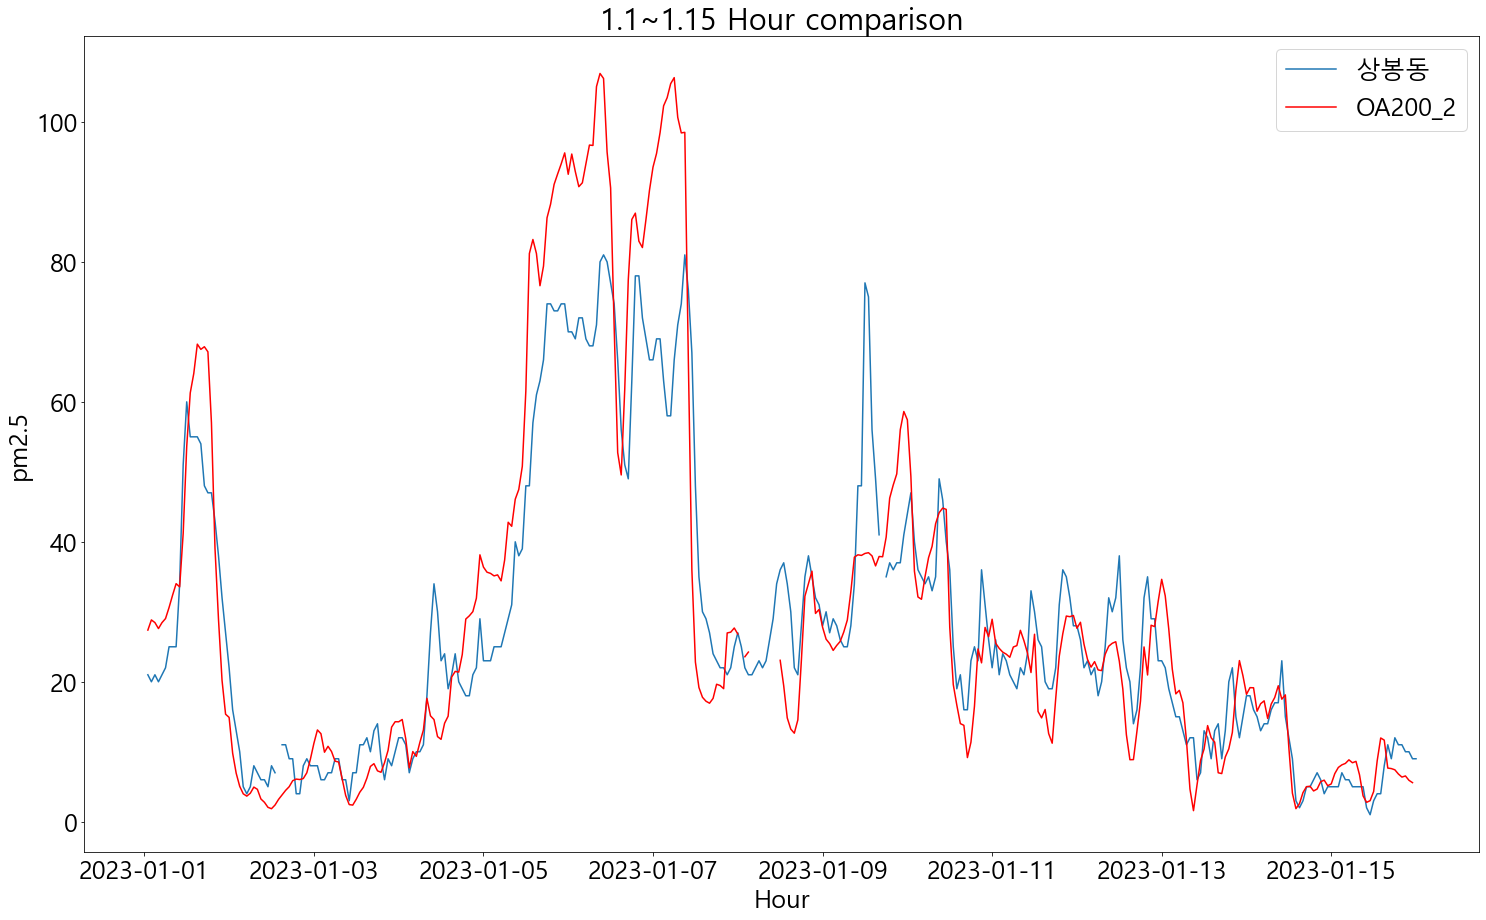

In [63]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['hour'] = arim_data.reg_date.apply(lambda x : x.hour)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()



# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)



# 그래프 2개 비교
plt.plot(airKorea_data.date, airKorea_data.pm25, arim_data_avg.index, arim_data_avg.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.1~1.15 Hour comparison')
plt.show()

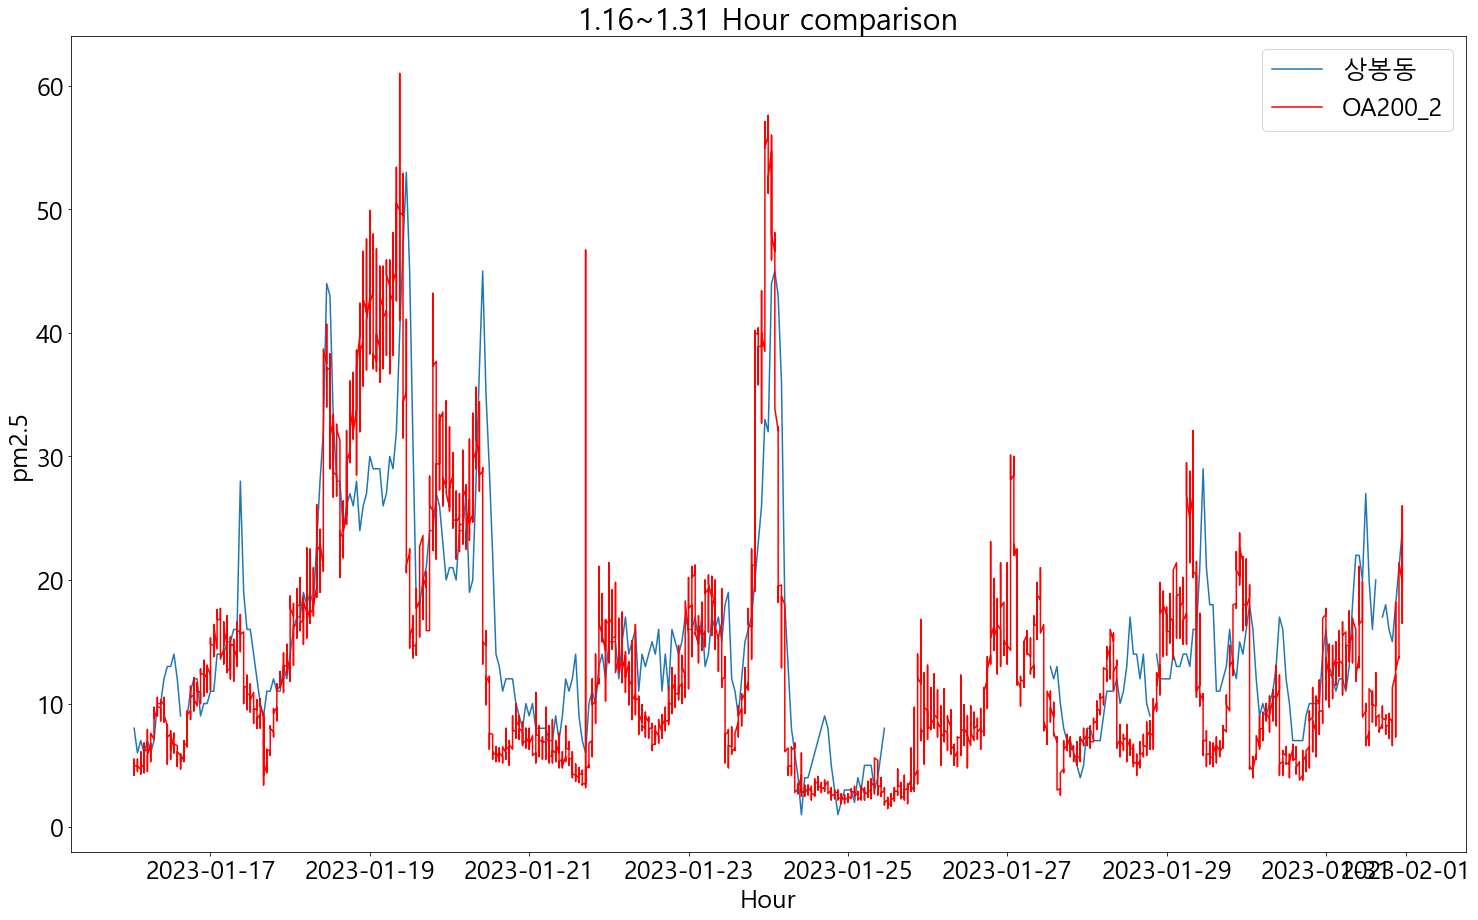

In [13]:
# arim_data 1.16~1.31 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.16~01.31.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 2번 함수 사용
arim_data['date'] = arim_data['reg_date'].apply(lambda x : substract_minutes(x))



# airKorea_data 1.16~1.31 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.16~01.31.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)



# 그래프 2개 비교
plt.plot(airKorea_data.date, airKorea_data.pm25, arim_data.date, arim_data.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('1.16~1.31 Hour comparison')
plt.show()


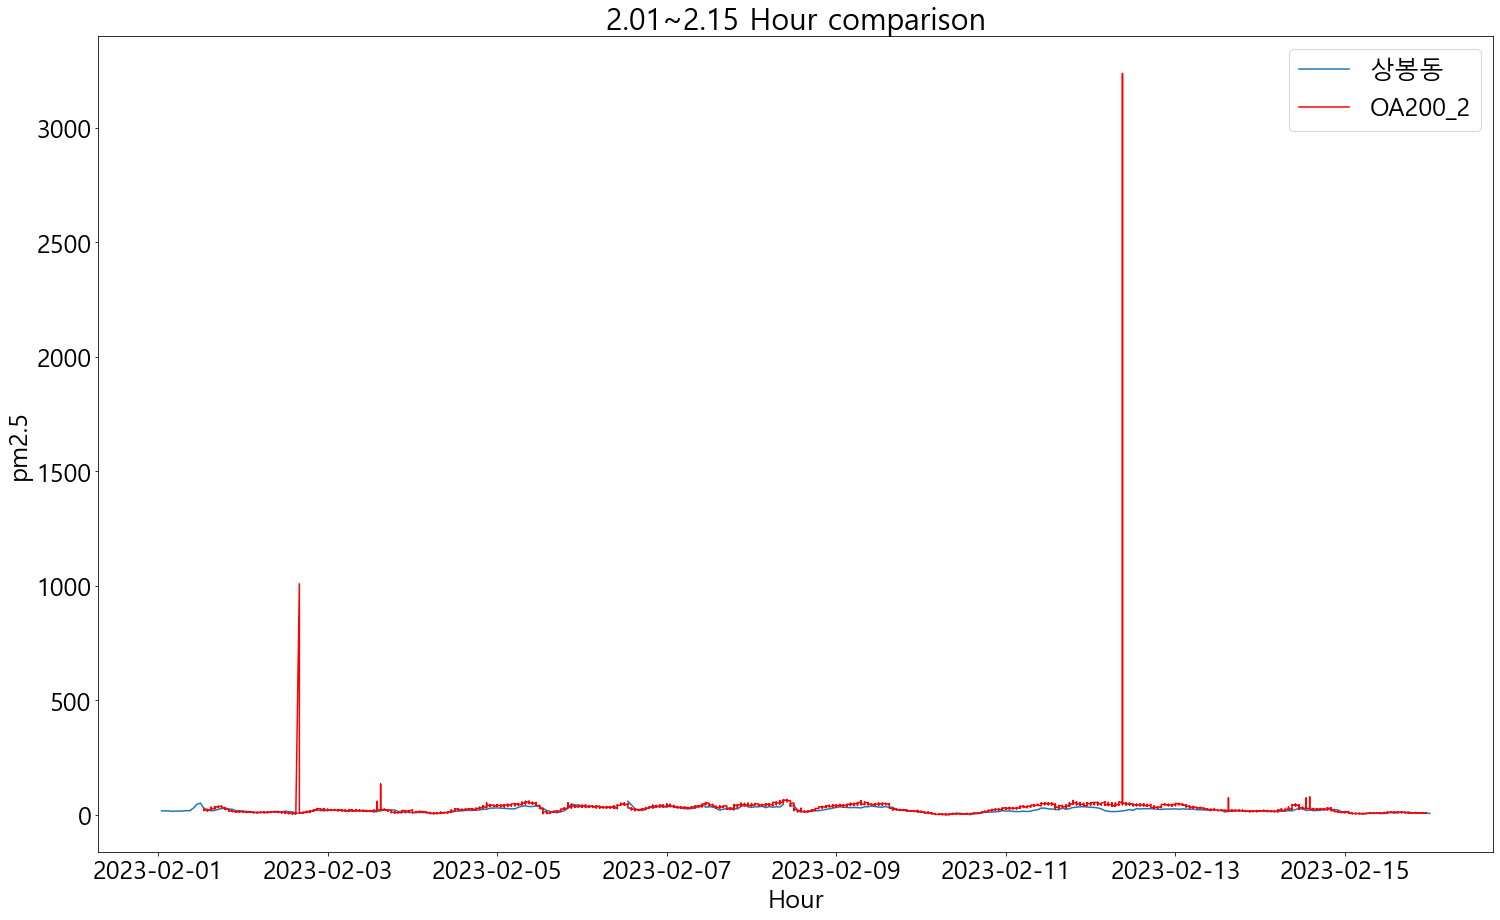

In [14]:
# arim_data 2.01~2.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_02.01~02.15.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 2번 함수 사용
arim_data['date'] = arim_data['reg_date'].apply(lambda x : substract_minutes(x))



# airKorea_data 2.01~2.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.01~02.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)



# 그래프 2개 비교
plt.plot(airKorea_data.date, airKorea_data.pm25, arim_data.date, arim_data.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('2.01~2.15 Hour comparison')
plt.show()

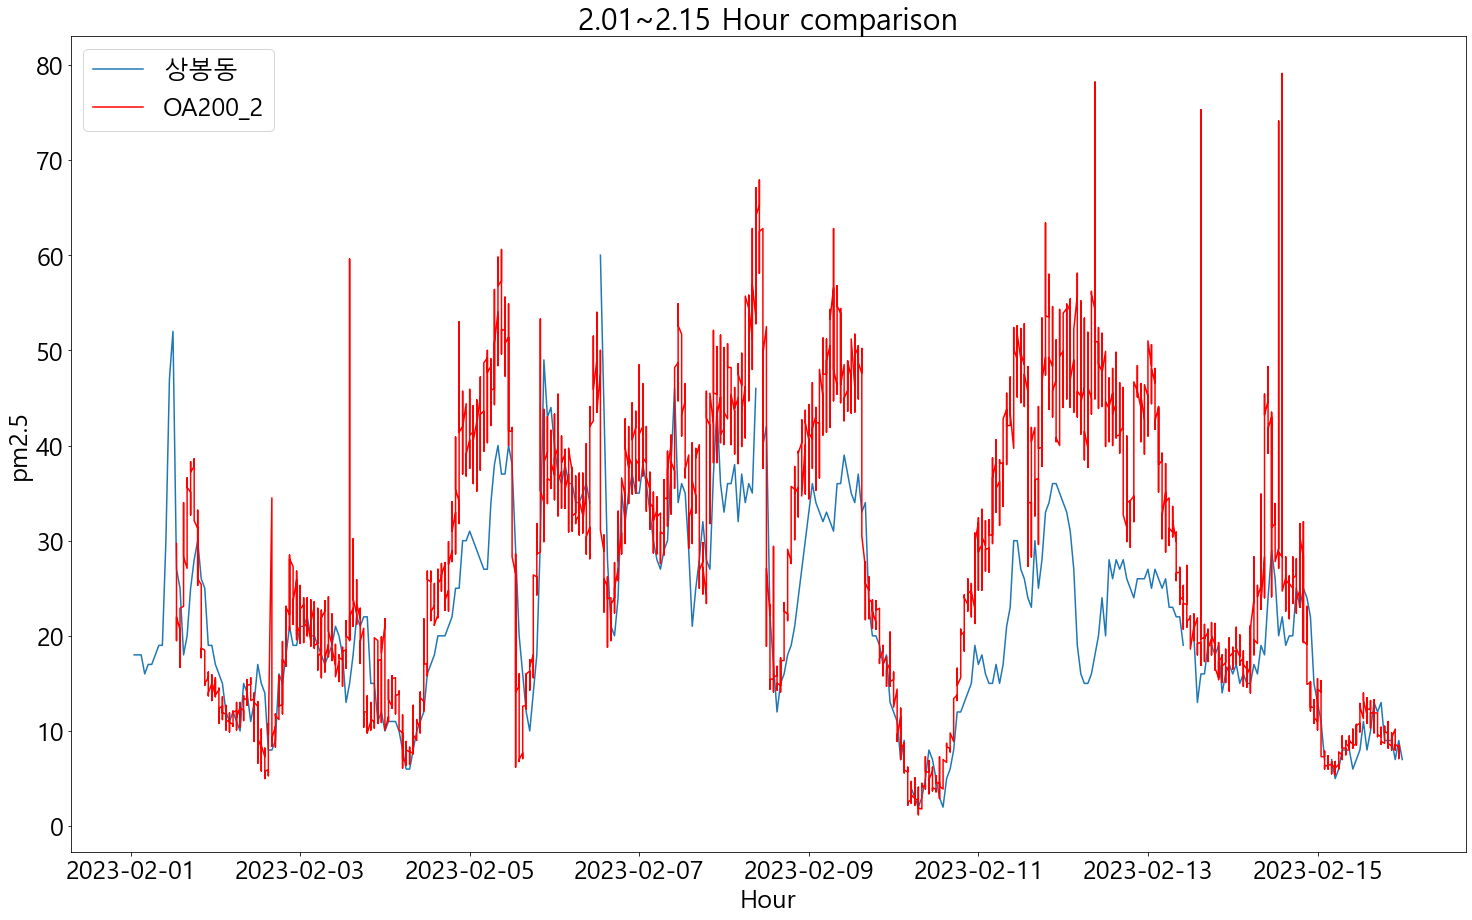

In [15]:
# arim_data 2.01~2.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_02.01~02.15.csv')

# 1번 함수 사용
remove_out(arim_data, ['pm25'])

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 2번 함수 사용
arim_data['date'] = arim_data['reg_date'].apply(lambda x : substract_minutes(x))



# airKorea_data 2.01~2.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.01~02.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)



# 그래프 2개 비교
plt.plot(airKorea_data.date, airKorea_data.pm25, arim_data.date, arim_data.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('2.01~2.15 Hour comparison')
plt.show()

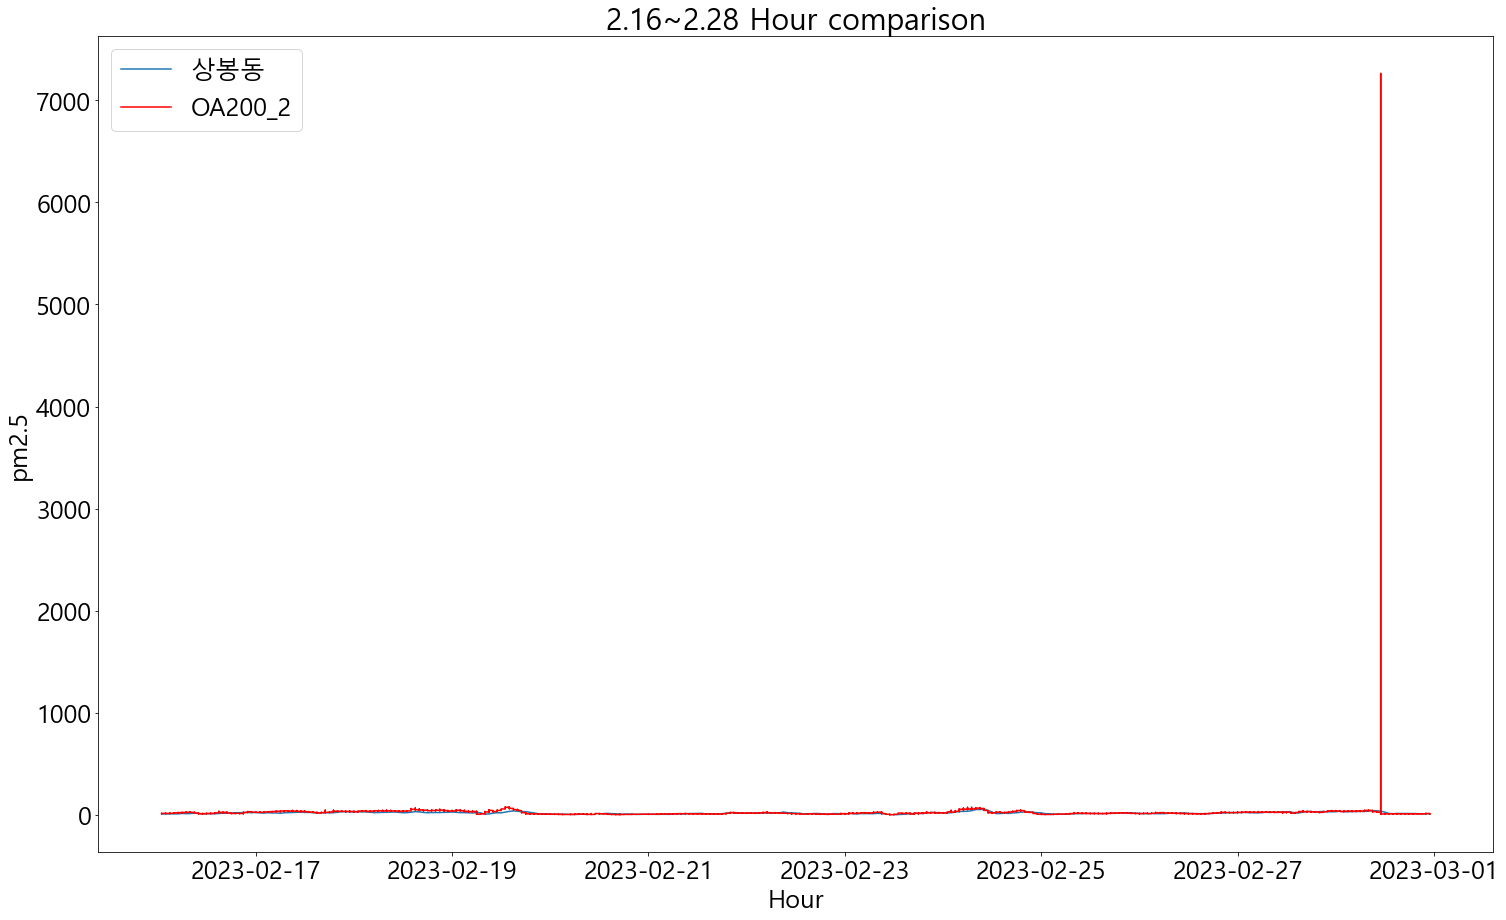

In [16]:
# arim_data 2.16~2.28 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_02.16~02.28.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 2번 함수 사용
arim_data['date'] = arim_data['reg_date'].apply(lambda x : substract_minutes(x))



# airKorea_data 2.16~2.28 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.16~02.28.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)



# 그래프 2개 비교
plt.plot(airKorea_data.date, airKorea_data.pm25, arim_data.date, arim_data.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('2.16~2.28 Hour comparison')
plt.show()

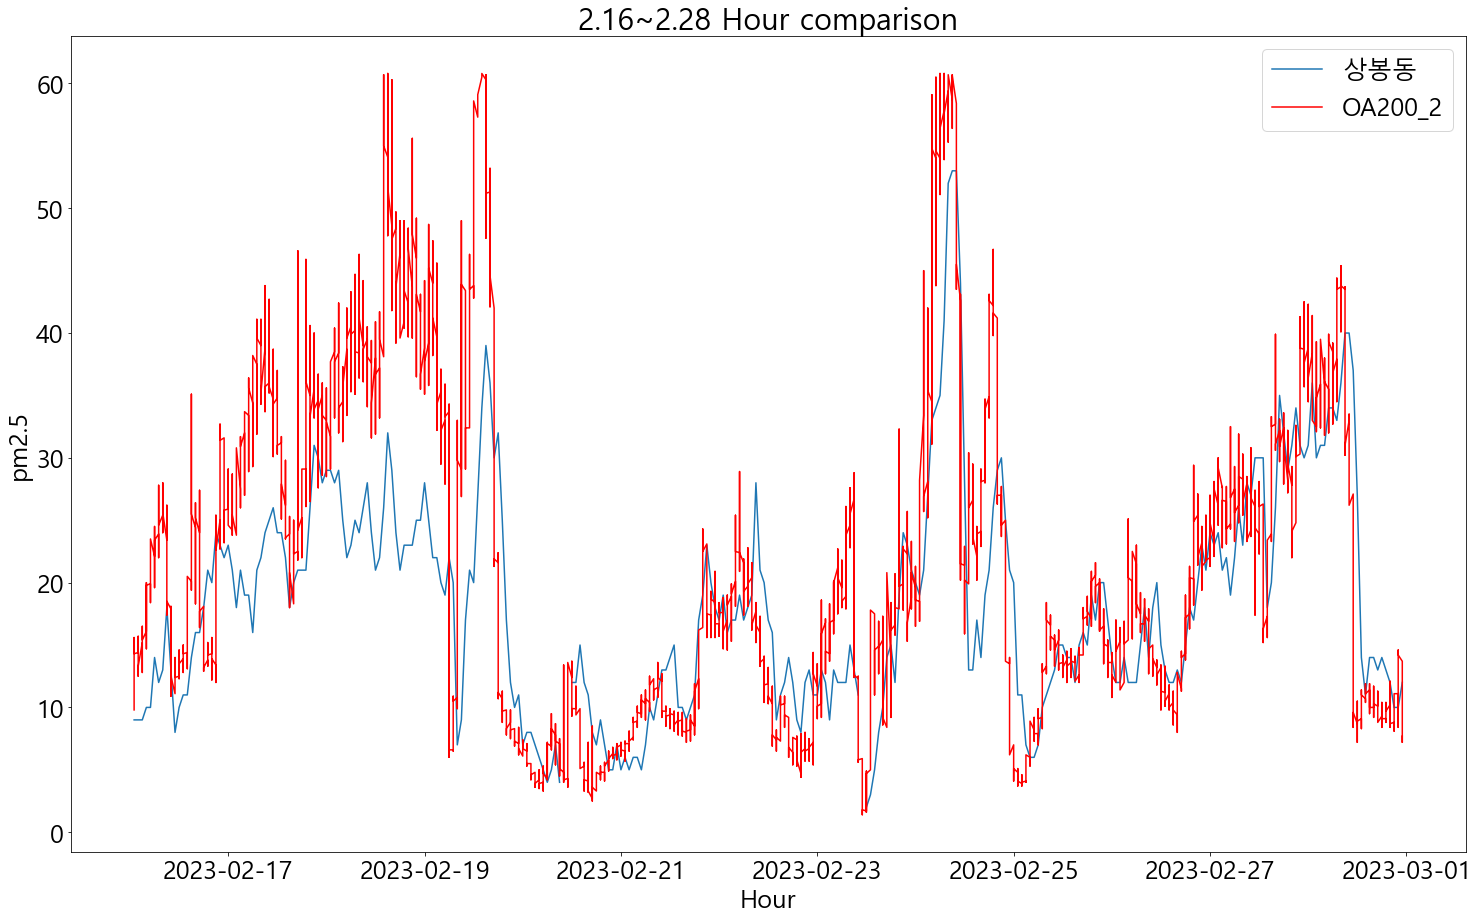

In [28]:
# arim_data 2.16~2.28 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_02.16~02.28.csv')

# 1번 함수 사용
remove_out(arim_data, ['pm25'])

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['hour'] = arim_data.reg_date.apply(lambda x : x.hour)

# 2번 함수 사용
arim_data['date'] = arim_data['reg_date'].apply(lambda x : substract_minutes(x))



# airKorea data 2.16~2.28 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.16~02.28.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)



# 그래프 2개 비교
plt.plot(airKorea_data.date, airKorea_data.pm25, arim_data.date, arim_data.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('2.16~2.28 Hour comparison')
plt.show()

### 위랑 비교 2번함수 사용과 groupby함수 사용 방법( 갯수는 같지만 변동폭이 심해 더 진하게 보인다고 가정만 하고 있음

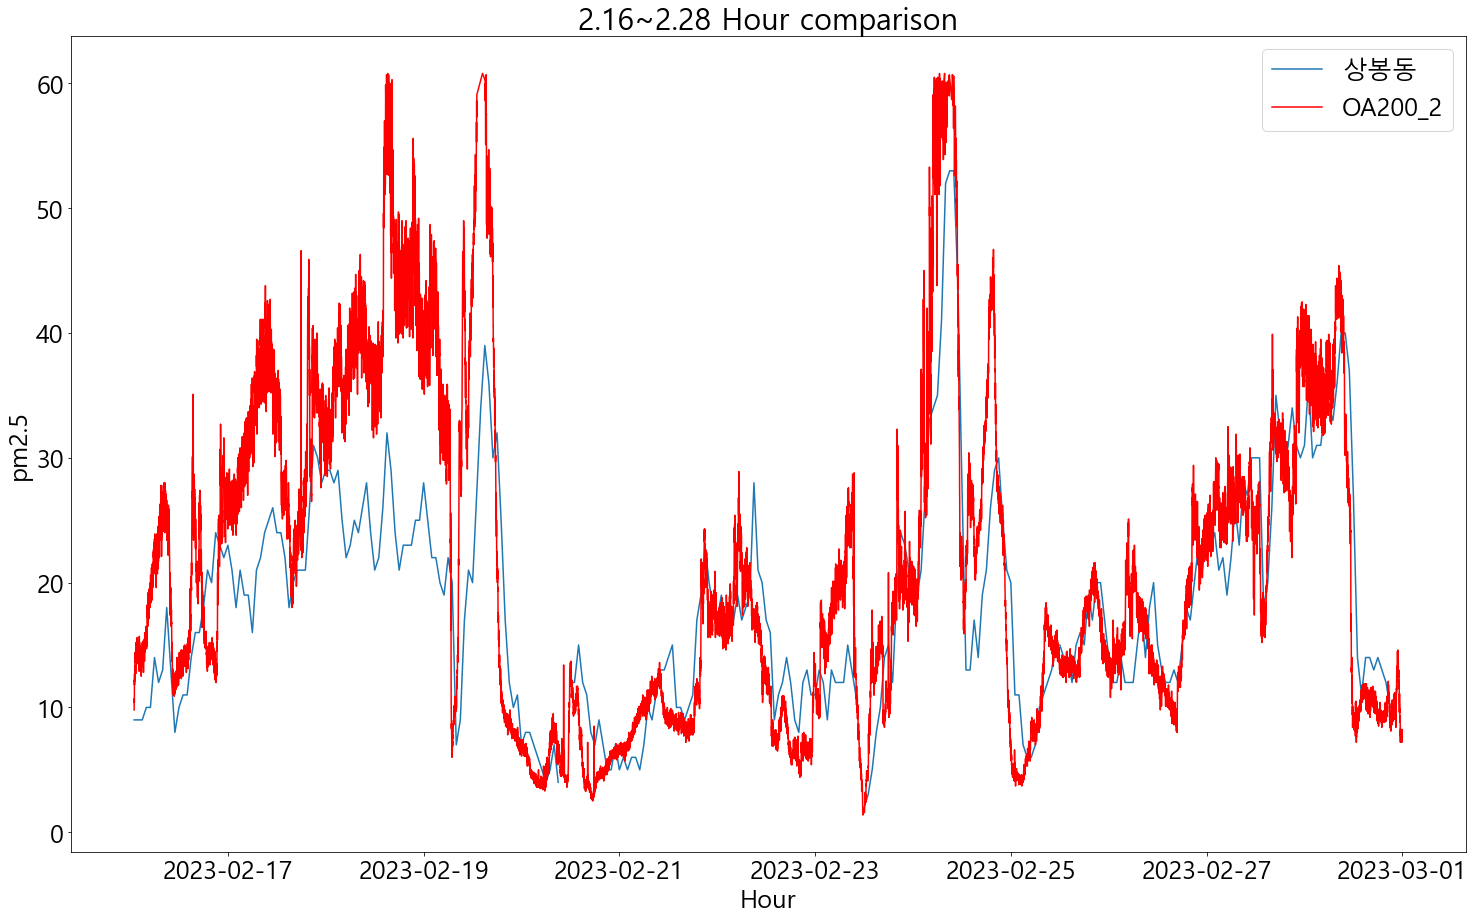

In [18]:
# arim_data 2.16~2.28 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_02.16~02.28.csv')

# 1번 함수 사용
remove_out(arim_data, ['pm25'])

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)
arim_data['hour'] = arim_data.reg_date.apply(lambda x : x.hour)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='D'), 'hour']).mean()


# airKorea data 2.16~2.28 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_02.16~02.28.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)



# 그래프 2개 비교
plt.plot(airKorea_data.date, airKorea_data.pm25, arim_data.reg_date, arim_data.pm25, 'r-')
plt.xlabel('Hour')
plt.ylabel('pm2.5')
plt.legend(('상봉동','OA200_2'))
plt.title('2.16~2.28 Hour comparison')
plt.show()

# 거리에 따른 데이터 분석

date
2023-01-06 09:00:00    19.921667
Freq: H, Name: pm25, dtype: float64


C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


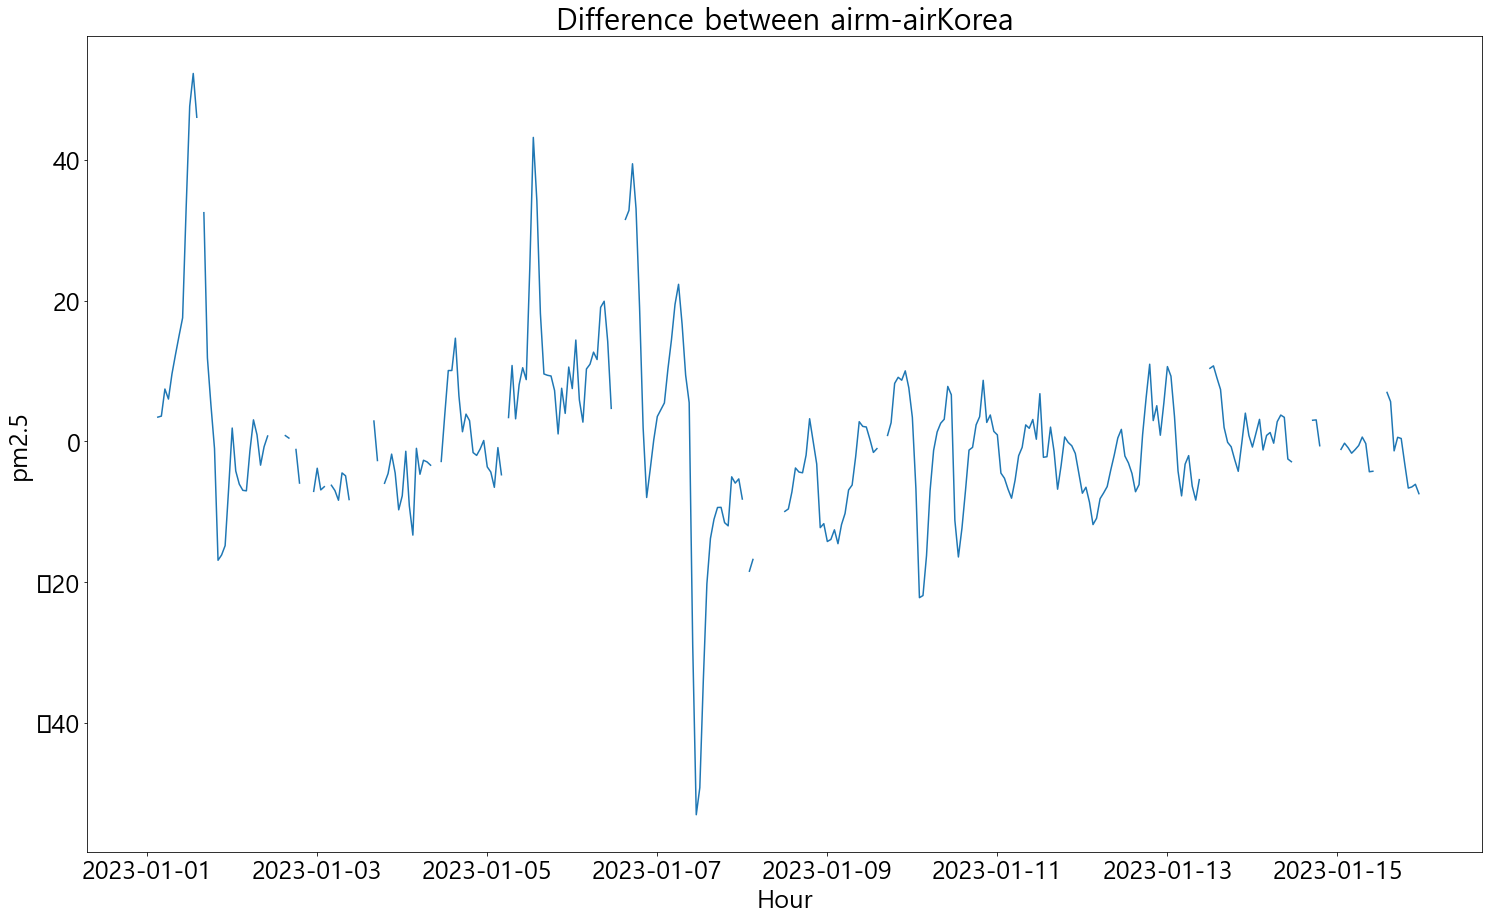

In [3]:
# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()


# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)
airKorea_data_avg = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 3번 함수 사용
print(find_max_value(arim_data_avg, airKorea_data_avg))


#그래프 2개 비교 (차이 비교)
diff = np.subtract(arim_data_avg['pm25'], airKorea_data_avg['pm25'])
plt.plot(arim_data_avg.index,diff)
plt.title("Difference between airm-airKorea")
plt.xlabel("Hour")
plt.ylabel("pm2.5")
plt.show()

26.921666666666667


ValueError: x and y must have same first dimension, but have shapes (359,) and (719,)

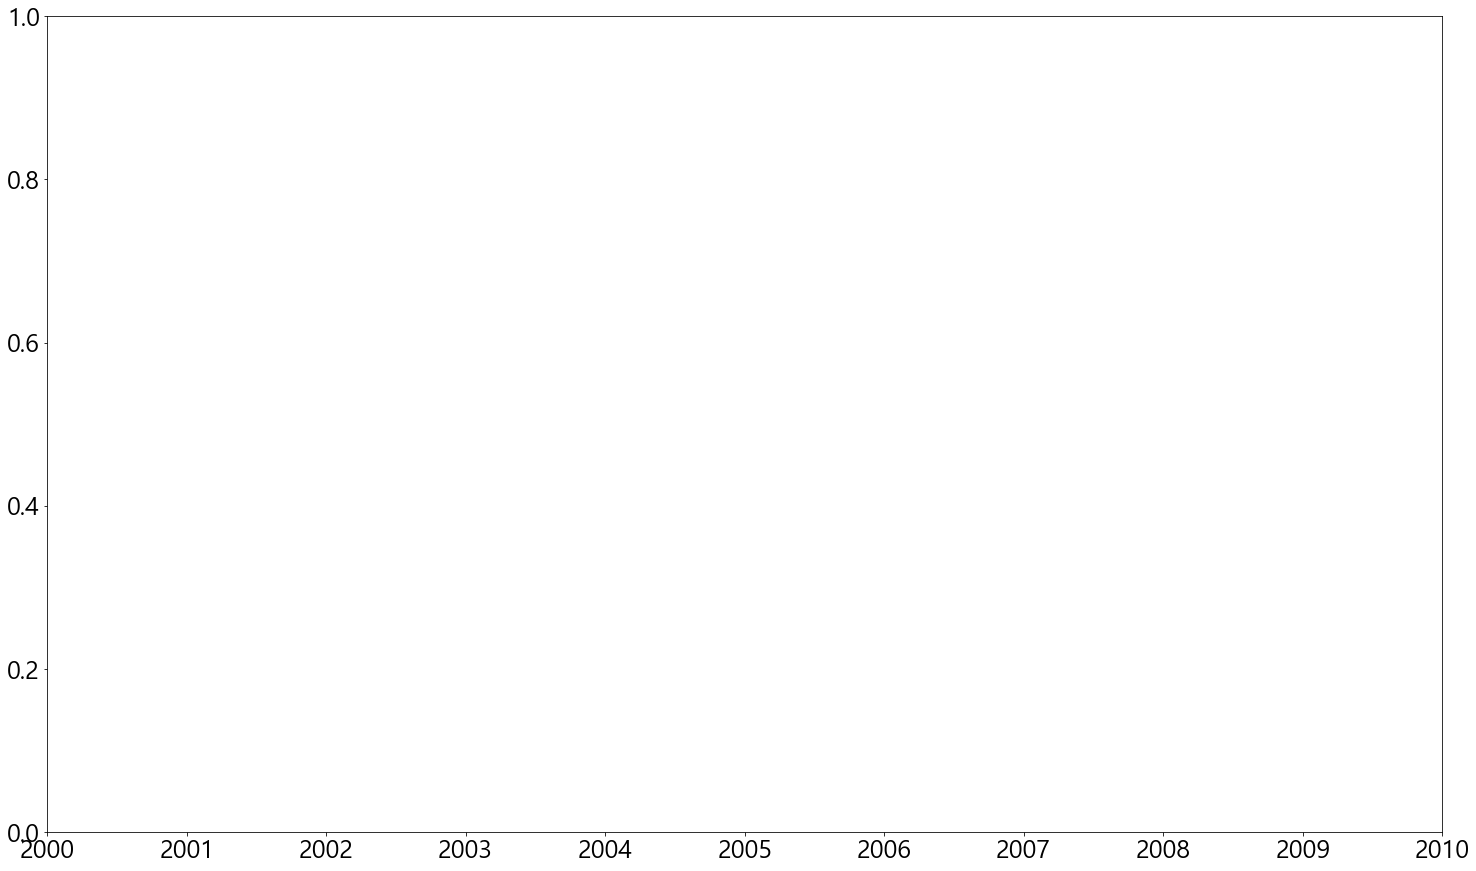

In [71]:
def find_max_value(data1, data2) :
    max_index = data1['pm25'].idxmax()
    arim = data1.loc[max_index, 'pm25'] # data1의 max값의 날짜에 맞는 pm25값
    arim_date = max_index  # Timestamp 객체에서 날짜 값을 저장
    air = data2.reset_index(drop=True).loc[data2['date'] == arim_date] # data1와 같은 날짜 찾기
    return abs(arim - air.pm25.item())

# arim_data 1.1~1.15 Hour
arim_data = pd.read_csv('./OA200_2/OA2002_01.01~01.15.csv')

arim_data['reg_date'] = arim_data.reg_date.apply(pd.to_datetime)

# 날짜별 그룹화하고 그 날짜별 시간대별로 다시 그룹화하여 평균값 계산
arim_data_avg = arim_data.groupby([pd.Grouper(key='reg_date', freq='H')]).mean()

# airKorea_data 1.1~1.15 Hour
airKorea_data = pd.read_csv('./AirKorea_상봉동/AirKorea_01.01~01.15.csv')

airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)

# 3번 함수 사용
print(find_max_value(arim_data_avg, airKorea_data))

# 그래프 2개 비교 (차이 비교)
diff = np.subtract(arim_data_avg['pm25'], airKorea_data['pm25'])
plt.plot(arim_data_avg.index, diff)
plt.title("Difference between airm-airKorea")
plt.xlabel("Hour")
plt.ylabel("pm2.5")
plt.show()